# Application Exercises 3 - Support Vector Machine

# 2021F-T1 AISC1003 - Machine Learning 1 01 (M07 Group 1)

# Prof. Jagmohan Dutta

# Name : Pratik Domadiya

# Student Id : 500199494

# Task : Perform Support Vector Machine on IRIS dataset

In [31]:
# Load the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
from sklearn import datasets

In [32]:
# load iris data 
data = datasets.load_iris()
print(data.DESCR) # print description of the whole data

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [33]:
# convert data to pandas dataframe 
feature_df=pd.DataFrame(data.data,columns=data.feature_names)
target_df=pd.DataFrame(data.target,columns=['Class'])
final_df=pd.concat([feature_df,target_df],axis=1)
final_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Class                150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


# Data Analysis - find correlation

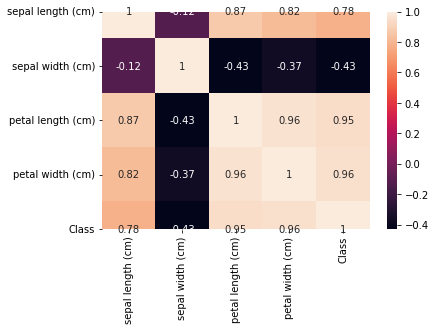

In [36]:
sns.heatmap(final_df.corr(),annot=True)

In [37]:
'''
petal width and petal length are highly correlated with target varible so we will use only those two for our model buliding.
'''
final_df.drop(columns=['sepal length (cm)','sepal width (cm)'],inplace=True)

In [38]:
final_df.head()

,petal length (cm),petal width (cm),Class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


# check for the outliers

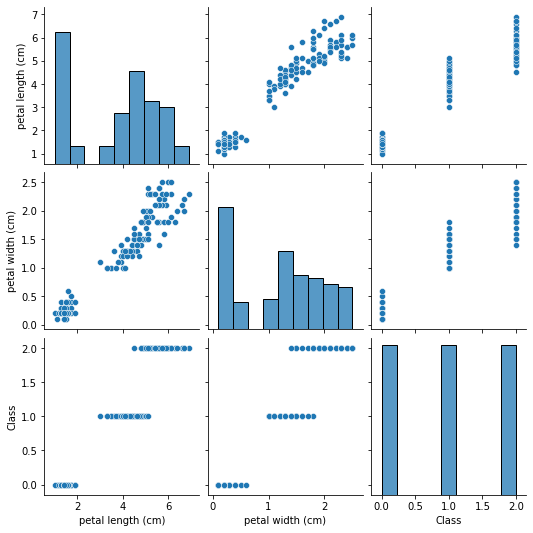

In [20]:
# check for outliers 
sns.pairplot(final_df)

[Text(0.5, 1.0, 'petal width (cm)')]

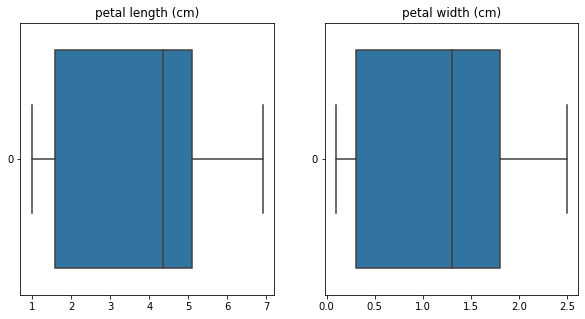

In [25]:
fig, axs = plt.subplots(figsize=(10,5),nrows=1,ncols=2)
plt.subplots_adjust(hspace = 0.6)
sns.boxplot(data=final_df['petal length (cm)'],ax=axs[0],orient="h").set(title='petal length (cm)')
sns.boxplot(data=final_df['petal width (cm)'],ax=axs[1],orient="h").set(title='petal width (cm)')


# scaling the features

In [57]:
# Here we can not find any outliers so we can apply standard scaler on the data to scale the data into normal distribution.

from sklearn.preprocessing import StandardScaler
X=final_df.iloc[:,0:-1]
y=final_df.iloc[:,-1]
trans = StandardScaler()
data = trans.fit_transform(X)
# convert the array back to a dataframe
X_scalled = pd.DataFrame(data)


# Preparing model

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_scalled, y, test_size=0.2, random_state=42)

X_tr_array = X_train
X_ts_array = X_test
y_tr_array = y_train.values
y_ts_array = y_test.values
print("original data set shape", final_df.shape)
print('train data Shape', (X_tr_array.shape))
print('test data Shape', X_ts_array.shape)
print('output data Shape', y_ts_array.shape)

original data set shape (150, 3)
train data Shape (120, 2)
test data Shape (30, 2)
output data Shape (30,)


# Linear Kernel Implementation


In [75]:
from sklearn import svm
## Creating the linear kernel
svc = svm.SVC(kernel='linear').fit(X_tr_array, y_tr_array)
pred = svc.predict(X_ts_array)
print ('Accuracy from sk-learn: {0}'.format(svc.score(X_ts_array, y_ts_array)))# display accuracy of the model

Accuracy from sk-learn: 1.0


Text(0.5, 1, 'Accuracy Score: 1.0')

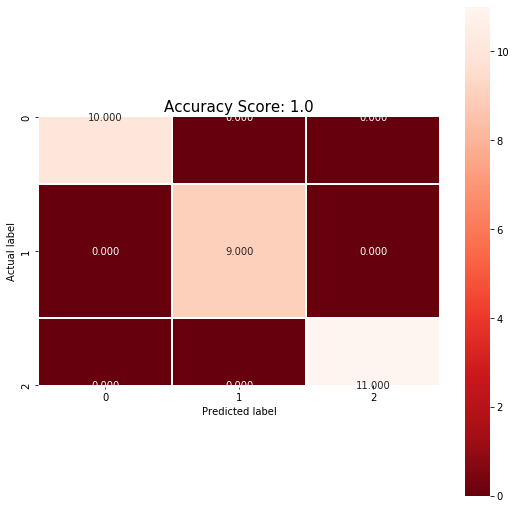

In [78]:
# print confusion metrics
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_ts_array,pred)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(svc.score(X_ts_array, y_ts_array))
plt.title(all_sample_title, size = 15)

In [79]:
# display model metrics 
print ('F1 score:', metrics.f1_score(y_ts_array,pred,average='weighted'))# display f1_score 

print ('Recall:', metrics.recall_score(y_ts_array,pred,average='weighted'))# display recall 

print ('Precision:', metrics.precision_score(y_ts_array,pred,average='weighted'))# display precision

print ('\n clasification report:\n', metrics.classification_report(y_ts_array,pred))# display classification report.

F1 score: 1.0
Recall: 1.0
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Sigmoid Kernel Implementation


In [107]:
from sklearn import svm
## Creating the sigmoid kernel
svc_classifier = svm.SVC(kernel='sigmoid').fit(X_tr_array, y_tr_array)
sig_pred = svc_classifier.predict(X_ts_array)
print ('Accuracy from sk-learn: {0}'.format(svc_classifier.score(X_ts_array, y_ts_array)))# display accuracy of the model

Accuracy from sk-learn: 0.9666666666666667


c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1, 'Accuracy Score: 0.9666666666666667')

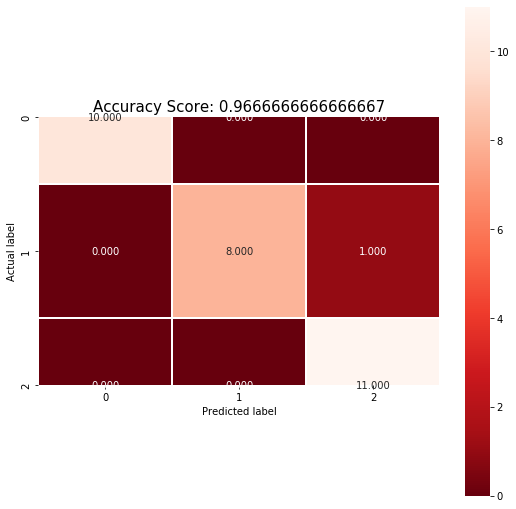

In [108]:
# print confusion metrics
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_ts_array,sig_pred)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(svc_classifier.score(X_ts_array, y_ts_array))
plt.title(all_sample_title, size = 15)

In [109]:
# display model metrics 
print ('F1 score:', metrics.f1_score(y_ts_array,pred,average='weighted'))# display f1_score 

print ('Recall:', metrics.recall_score(y_ts_array,pred,average='weighted'))# display recall 

print ('Precision:', metrics.precision_score(y_ts_array,pred,average='weighted'))# display precision

print ('\n clasification report:\n', metrics.classification_report(y_ts_array,pred))# display classification report.

F1 score: 0.8629629629629628
Recall: 0.8666666666666667
Precision: 0.9047619047619048

 clasification report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      1.00      1.00         9
           2       1.00      0.64      0.78        11

    accuracy                           0.87        30
   macro avg       0.90      0.88      0.87        30
weighted avg       0.90      0.87      0.86        30



# Gaussian Radial Basis Function Implementation

In [100]:
from sklearn import svm
## Creating the RBF-Gaussian Radial Basis Function  kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.1).fit(X_tr_array, y_tr_array)
rbf_pred = rbf_svc.predict(X_ts_array)
print ('Accuracy from sk-learn: {0}'.format(rbf_svc.score(X_ts_array, y_ts_array)))# display accuracy of the model

Accuracy from sk-learn: 1.0


Text(0.5, 1, 'Accuracy Score: 1.0')

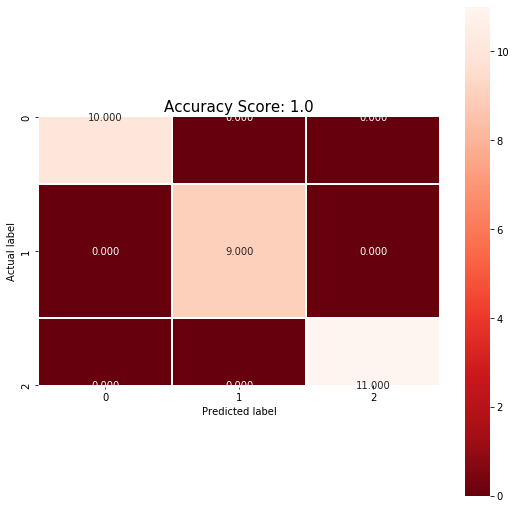

In [101]:
# print confusion metrics
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_ts_array,rbf_pred)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rbf_svc.score(X_ts_array, y_ts_array))
plt.title(all_sample_title, size = 15)

In [99]:
# display model metrics 
print ('F1 score:', metrics.f1_score(y_ts_array,rbf_pred,average='weighted'))# display f1_score 

print ('Recall:', metrics.recall_score(y_ts_array,rbf_pred,average='weighted'))# display recall 

print ('Precision:', metrics.precision_score(y_ts_array,rbf_pred,average='weighted'))# display precision

print ('\n clasification report:\n', metrics.classification_report(y_ts_array,rbf_pred))# display classification report.

F1 score: 1.0
Recall: 1.0
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Polynomial Kernel Implementation


In [103]:
from sklearn import svm
## Creating the polynomial kernel
poly_svc = svm.SVC(kernel='poly', degree=2).fit(X_tr_array, y_tr_array)
poly_pred = poly_svc.predict(X_ts_array)
print ('Accuracy from sk-learn: {0}'.format(poly_svc.score(X_ts_array, y_ts_array)))# display accuracy of the model

Accuracy from sk-learn: 0.8666666666666667


c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1, 'Accuracy Score: 0.8666666666666667')

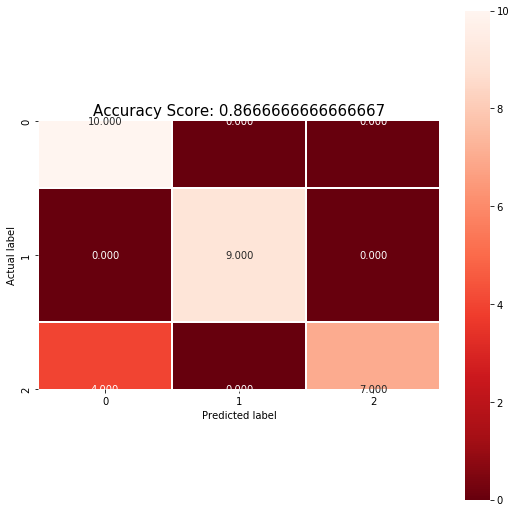

In [104]:
# print confusion metrics
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_ts_array,poly_pred)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(poly_svc.score(X_ts_array, y_ts_array))
plt.title(all_sample_title, size = 15)

In [105]:
# display model metrics 
print ('F1 score:', metrics.f1_score(y_ts_array,poly_pred,average='weighted'))# display f1_score 

print ('Recall:', metrics.recall_score(y_ts_array,poly_pred,average='weighted'))# display recall 

print ('Precision:', metrics.precision_score(y_ts_array,poly_pred,average='weighted'))# display precision

print ('\n clasification report:\n', metrics.classification_report(y_ts_array,poly_pred))# display classification report.

F1 score: 0.8629629629629628
Recall: 0.8666666666666667
Precision: 0.9047619047619048

 clasification report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      1.00      1.00         9
           2       1.00      0.64      0.78        11

    accuracy                           0.87        30
   macro avg       0.90      0.88      0.87        30
weighted avg       0.90      0.87      0.86        30



In [ ]:
'''
Final Analysis : 

I have used four different SVM kernel on iris dataset. On which Linear kernel and RBF kernel gives us 
the best and accurate result as compare to polynomial and sigmoid kernel.
'''

'''
References : 

https://dataaspirant.com/svm-kernels/
https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

'''